# Exercise 2

In this exercise,I will use different kernel to finish edges detection.And make the edge into red.  
How do we find the edges in a image? Because the pixels of edges are different with the pixels of neighbor points. So we need to find where pixel change most. The bigger change, the more edges will be more clear.   
We can use derivative to show the rate of changing.  
We can get the derivative of x-direction and y-direction of original image.  
$G_x=\dfrac{dG}{dx}$  $G_y=\dfrac{dG}{dy}$    
$G_x$ and $G_y$ are the derivate of x-direction and y-direction.  
If we want to the edge information of two direction in an image. We will use gradient.  
$|G_xy|=\sqrt{G_x^2 + G_y^2}$  
In real image, the matrix of the image is discrete. So we use different to represent the changing rate.   
The formula of calculating the different:  
Different of x-direction:$G_x(n,y)= G(n-1,y)$  
Different of y-direction:$G_y(x,n)= G(x,n-1)$  
In real calculating the derivative of image, we always use a kernel to convolve with image.
Just like the blurring. So I use the same function in exercise 1 to creat b-image and convolve with image.  
I will use Sob kernel and Laplace kernel.  

## Load image first

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
img=np.array(Image.open('lakers.jpg'))
plt.figure("a")
plt.imshow(img)
plt.axis('off')
plt.show()

Import the function from exercise

In [2]:
def handfilter(kernel,img1,length,length_1): # this is the filter by hand 
    kernel_length=len(kernel)
    [a,b,c]=np.shape(img1)
    img_out=np.zeros([a-length,b-length,c], dtype=None, order='C')
    [x,y,z]=np.shape(img_out)
    for i in range(x):
        for j in range(y):
            for l in range(z):
                temp=0
                for ii in range (kernel_length):
                    for jj in range (kernel_length):
                        temp=temp+img1[i+ii,j+jj,l]*kernel[ii,jj]
                img_out[i,j,l]=temp        
    return img_out    

def creatimage(img,kernel):
    [a,b,c]=np.shape(img)
    kernel_length=len(kernel)
    length=int(kernel_length-1)
    length_1=int(length/2)
    img1=np.zeros([a+length,b+length,c], dtype=None, order='C')
    [z,x,y]=np.shape(img1)
    for i in range(a):
        for j in range(b):
            for k in range(c):
                img1[i+length_1,j+length_1,k]=img[i,j,k]
    return img1,length,length_1

## Sob kernel  
  
The kernel of x-direction:  
$\left[\begin{matrix} -1 & 0 & 1 \\-2 & 0 & 2 \\-1 & 0 & 1\end{matrix}\right]$  
The kernel of y-direction:  
$\left[\begin{matrix} -1 & -2 & -1 \\0 & 0 & 0 \\1 & 2 & 1\end{matrix}\right]$  

In [3]:
# use sob
# sob of x
sob_x = np.array([[-1, 0, 1],
                    [ -2, 0, 2],
                    [ -1, 0, 1]])

# sob of y
sob_y = np.array([[-1,-2,-1],
                     [ 0, 0, 0],
                     [ 1, 2, 1]])

In [4]:
imgx,length,length_1=creatimage(img,sob_x) 
imgy,length,length_1=creatimage(img,sob_y) 

In [5]:
imgfx=handfilter(sob_x,imgx,length,length_1) # get the matrix of x-direction
imgfy=handfilter(sob_y,imgy,length,length_1) # get the matrix of y-direction
new_imxy= np.sqrt(imgfx**2+imgfy**2) #get gradient matrix

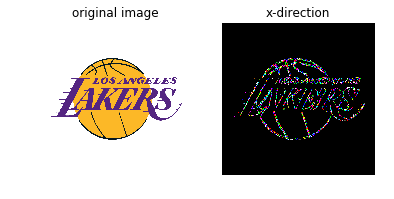

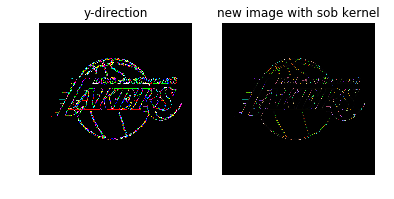

In [6]:
new_imx = Image.fromarray(imgfx.astype(np.uint8))
new_imy = Image.fromarray(imgfy.astype(np.uint8))
new_imxy= np.sqrt(imgfx**2+imgfy**2)
new_imsob=Image.fromarray(new_imxy.astype(np.uint8))

plt.figure()
plt.subplot(1,2,1)
plt.title('original image')
plt.imshow(img)
plt.axis('off')
plt.subplot(1,2,2)
plt.title('x-direction')
plt.imshow(new_imx)
plt.axis('off')
plt.figure()
plt.subplot(1,2,1)
plt.title('y-direction')
plt.imshow(new_imy)
plt.axis('off')
plt.subplot(1,2,2)
plt.title('new image with sob kernel')
plt.imshow(new_imsob)
plt.axis('off')

plt.show()
new_imsob.save('sob.jpg')

I change the new image into gray and binaryzation and change to edges into red.

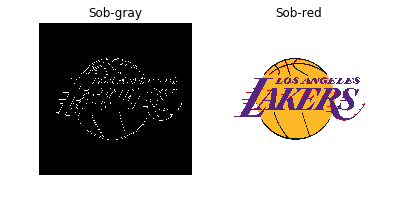

In [7]:
#gray and binaryzation
gray_sob=np.array(Image.open('sob.jpg').convert('L'))
[x_gray,y_gray]=gray_sob.shape
for i in range (x_gray):
    for j in range (y_gray):
        if(gray_sob[i,j]>50):
            gray_sob[i,j]=255
    else:
        gray_sob[i,j]=0  

plt.subplot(1,2,1)        
plt.title('Sob-gray')
plt.imshow(gray_sob,'gray')
plt.axis('off')
img_gray_sob=Image.fromarray(gray_sob.astype(np.uint8))
img_gray_sob.save('sob_gray.jpg')        

#change to edges into red
img0=np.array(Image.open('lakers.jpg'))
[img_x,img_y,cc]= np.shape(img0)
gray_lakers=np.array(Image.open('sob_gray.jpg'))
[x_gray,y_gray]=np.shape(gray_lakers)
for i in range(img_x):
    for j in range (img_y):
        if (gray_lakers[i,j]==255):
            if (i!=0) or (j!=0):
                img0[i,j,0]=255
                img0[i,j,1]=0
                img0[i,j,2]=0
                

plt.subplot(1,2,2)
plt.title('Sob-red')
plt.imshow(img0)
plt.axis('off')
plt.show()
red_edge_sob = Image.fromarray(img0.astype(np.uint8))
red_edge_sob.save('red_edge_sob.jpg')

## Edges detection after noise reduction  
  
In order to make a better result of edges detection, we can blur image firstly. I will use gaussian blurring. The gaussian blurring function is same as exercise 1.  
Then I will use laplace kernel.Laplace kernel is a approximate getting derivate of the sum of second derivative in x-direction and the sum of second derivative in y-direction.

Using gaussian kernel to blur image firstly.

In [8]:
sigma=input("sigma：")
sigma=int(sigma)
kernel_size=input("kernel size:")
kernel_size=int(kernel_size)

def gaussian_kernel(kernel_size,sigma):   
    kernel = np.zeros([kernel_size,kernel_size])
    center = int(kernel_size/2)
    s = 2*(sigma**2)*np.pi
    sum_val = 0
    for i in range(0,kernel_size):
        for j in range(0,kernel_size):
            x = i-center
            y = j-center
            kernel[i,j] = np.exp(-(x**2+y**2)/s)
            sum_val=sum_val+kernel[i,j]
    sum_val=1/sum_val
    gaussk=kernel*sum_val
    return gaussk

gaussk=gaussian_kernel(kernel_size,sigma)
imgg,lengthg,length_g=creatimage(img,gaussk)
imgfg=handfilter(gaussk,imgg,lengthg,length_g)
new_imgg = Image.fromarray(imgfg.astype(np.uint8))

sigma：7
kernel size:5


One of the laplace kernel is :  
$\left[\begin{matrix} 1 & 1 & 1 \\1 & -8 & 1 \\1 & 1 & 1\end{matrix}\right]$ 

In [9]:
laplace = np.array([[1, 1, 1],
                    [1,-8, 1],
                    [1, 1, 1]])

In [10]:
img_L,lengthL,length_1L=creatimage(imgfg,laplace)
img_fL=handfilter(laplace,img_L,lengthL,length_1L)
new_img_la = Image.fromarray(img_fL.astype(np.uint8))

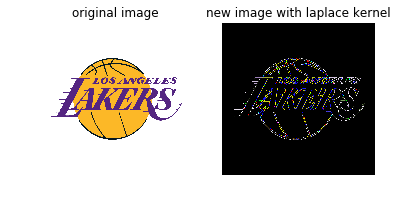

In [11]:
plt.figure()
plt.subplot(1,2,1)
plt.title('original image')
plt.imshow(img)
plt.axis('off')
plt.subplot(1,2,2)
plt.title('new image with laplace kernel')
plt.imshow(new_img_la)
plt.axis('off')
plt.show()
new_img_la.save('laplace.jpg')

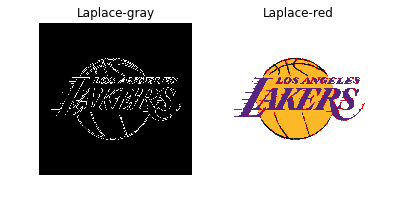

In [12]:
#gray and binaryzation
gray_la=np.array(Image.open('laplace.jpg').convert('L'))
[x_gray,y_gray]=gray_la.shape
for i in range (x_gray):
    for j in range (y_gray):
        if(gray_la[i,j]>50):
            gray_la[i,j]=255
    else:
        gray_la[i,j]=0  

plt.subplot(1,2,1)        
plt.title('Laplace-gray')
plt.imshow(gray_la,'gray')
plt.axis('off')
img_gray_LA=Image.fromarray(gray_la.astype(np.uint8))
img_gray_LA.save('Laplace_gray.jpg')        

#change to edges into red
img0=np.array(Image.open('lakers.jpg'))
[img_x,img_y,cc]= np.shape(img0)
gray_lakers=np.array(Image.open('Laplace_gray.jpg'))
[x_gray,y_gray]=np.shape(gray_lakers)
for i in range(img_x):
    for j in range (img_y):
        if (gray_lakers[i,j]==255):
            if (i!=0) or (j!=0):
                img0[i,j,0]=255
                img0[i,j,1]=0
                img0[i,j,2]=0
                

plt.subplot(1,2,2)
plt.title('Laplace-red')
plt.imshow(img0)
plt.axis('off')
plt.show()
red_edge_sob = Image.fromarray(img0.astype(np.uint8))
red_edge_sob.save('red_edge_Laplace.jpg')

I will compare the results of sob and laplace:

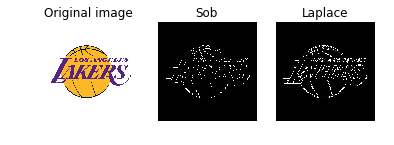

In [13]:
plt.subplot(1,3,1)
plt.title('Original image')
plt.imshow(img)
plt.axis('off')
plt.subplot(1,3,2)
plt.title('Sob')
plt.imshow(gray_sob,'gray')
plt.axis('off')
plt.subplot(1,3,3)
plt.title('Laplace')
plt.imshow(gray_la,'gray')
plt.axis('off')
plt.show()

According to the results, we can see that only using sob is worse than using gussian kernel and laplace kernel. I think because before I use laplace kernel to detect edges, I use gaussian kernel to reduce noisy. This action may make the edge more clear. 

## Canny edges detection  
  
I will use cv.canny in the library.  
The princple of Canny edges detection:  
Step1: Noisy reduction  
Step2: Calculate the gradient of image.  
Step3: Non-Maximum Suppression.  
Step4: In order to make sure the true edges. Set two threshold: minVal and maxVal. When the gradient bigger than maxVal, it is true edge. When the gradient less than minVal, it is not true edge, give up it. If the gradient is between two threshold and the point connects to the true edge, it is true edge. If the point doesn't connect to the true edge, give up it.

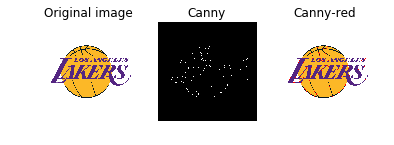

In [14]:
img1 = cv2.imread('lakers.jpg',0)
canny = cv2.Canny(img1,100,200) #100 is minVal and 200 is maxVal
cv2.imwrite('Canny.jpg',canny)


#change to edges into red
img0=np.array(Image.open('lakers.jpg'))
[img_x,img_y,cc]= np.shape(img0)
for i in range(img_x):
    for j in range (img_y):
        if (canny[i,j]==255):
            img0[i,j,0]=255
            img0[i,j,1]=0
            img0[i,j,2]=0
            
            
plt.subplot(1,3,1)
plt.title('Original image')
plt.imshow(img)
plt.axis('off')
plt.subplot(1,3,2)
plt.title('Canny')
plt.imshow(canny,cmap='gray')
plt.axis('off')            
plt.subplot(1,3,3)
plt.title('Canny-red')
plt.imshow(img0)
plt.axis('off')
plt.show()
canny = Image.fromarray(img0.astype(np.uint8))
canny.save('red_edge_lakers_canny.jpg')

Compare three ways:

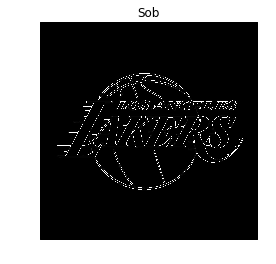

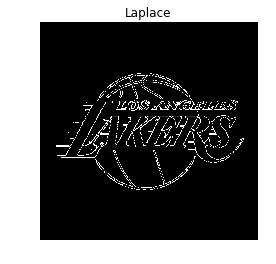

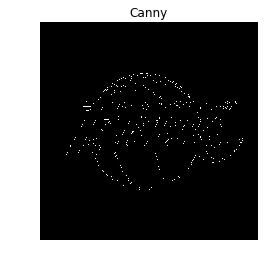

In [15]:
imgcanny = cv2.imread('Canny.jpg')
plt.figure()
plt.title('Sob')
plt.imshow(gray_sob,'gray')
plt.axis('off')
plt.figure()
plt.title('Laplace')
plt.imshow(gray_la,'gray')
plt.axis('off')
plt.figure()
plt.title('Canny')
plt.imshow(imgcanny,cmap='gray')
plt.axis('off') 
plt.show()


According to the results, we can see that Laplace kernel performance best. But canny function also reduce noisy before detecting edges. So I think the reason that laplace performance well is the kernel itself. Because laplace is a kernel with second derivative.